# Analýza datasetu ARDIS 
ARDIS (Arkiv Digital Sweden) je referenčný dataset obsahujúci historické ručne písané číslice. Vznikol ako reakcia na nízku úspešnosť klasifikácie systémov trénovaných na súčasných a testovaných na historických dátach. Jeho autormi sú Dr. Huseyin Kusetogullari, Assoc. Prof. AbbasCheddad-Department of Computer Science, Blekinge Tekniska Högskola.
#### <span style="color: blue;">Štruktúra:</span>
Dataset je celkovo tvorený 4 datasetmi obsahujúcimi obrázky .jpg reťazcov so 4 číslicami, obrázkami .jpg číslic so zašumeným pozadím, obrázkami .jpg číslic s odšumeným pozadím a vzorkami číslic v .csv formáte korešpondujúcim s datasetom MNIST:
* ARDIS Dataset I
* ARDIS Dataset II
* ARDIS Dataset III
* __ARDIS Dataset IV__

V tejto konkrétnej analýze sme sa zamerali na podmnožinu ARDIS Dataset IV.
Podmnožina je tvorená trénovacou a testovaciou sadou dát. Trénovacia sada obsahuje 6 600 vzoriek rukou písaných číslic. Testovacia sada naproti tomu obsahuje 1 000 vzoriek rukou písaných číslic.
#### <span style="color: blue;">Formát vzorky:</span>
Vzorky číslic datasetu majú veľkosť 28x28 pixelov a farebný formát grayscale, teda každý pixel vzorky obsahuje hodnotu reprezentujúcu intenzitu svetla.
#### <span style="color: blue;">Pôvod:</span>
Dataset ARDIS bol vytvorený v roku 2019 zo švédskych historických cirkevných záznamov vytvorených v rokoch 1895 až 1970.
<br>Sada Dataset I bola vytvorená manuálnym obdĺžnikovým výberom veľkosti 175x95 pixelov zachytávajúcim roky z približne 10 0000 cirkevných dokumnetov v pravom, respektíve ľavom hornom rohu. Dataset obsahuje 10 000 vzoriek.
<br>Sada Dataset II bola vytvorená manuálnym obdĺžnikovým výberom variabilnej veľkosti číslic z približne 15 000 cirkevných dokumentov, pri zachovaní reálnej pôvodnej veľkosti vzorky v závislosti od veľkosti samotného obdĺžnikového výberu. Dataset obsahuje 7 600 vzoriek.
<br>Sada Dataset III bola odvodená od sady Dataset II, kde sú pôvodné vzorky manuálne odšumené od pozostatkov iných čislic, riadkov a iných nečistôt. Dataset obsahuje rovnako 7 600 vzoriek.
<br>Sada Dataset IV bola odvodená od sady Dataset III, kde sú vzorky transformované a normalizované do formátu korešpondujúcim s referečným datsetom MNIST, teda na veľkosť 28x28 pixelov a farebný formát grayscale. Vzorky sú rozdelné do trénovacej a testovacej podmnožiny v pomere 6 600 k 1 000.

---
## Importovanie modulov:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#príkaz umožnujúci embedded inline kompiláciu modulu matplotlib
%matplotlib inline

---
## Importovanie datasetu:
Na analýzu je potrebné dataset importovať do premennej typu pandas.DataFrame. Do premennej ___ardis_train_data_df___ sme importovali trénovaciu a do premennej ___ardis_test_data_df___ testovaciu časť datasetu. Do premenných __ardis_train_label_df__ a __ardis_test_label_df__ sme uložili označenie vzoriek jednotlivých dát. Nakoľko v našom prípade je pôvodný dataset typu .csv (Comma-separated value) a neobsahuje popisy stĺpcov, je na import použitý konštruktor read_csv s parametrom header inicializovaným na hodnotu None. Nakoľko hodnoty v datasete neboli štandardne oddelené čiarkou, museli sme uviesť aj separátor hodnôt v premennej separator. 

In [2]:
#inicializácia DataFrame-u zo súboru typu .csv
ardis_train_data_df = pd.read_csv("/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/ARDIS/ARDIS_DATASET_IV/ARDIS_train_2828.csv", sep=" ", header=None)
ardis_test_data_df = pd.read_csv("/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/ARDIS/ARDIS_DATASET_IV/ARDIS_test_2828.csv", sep=" ", header=None)
ardis_train_label_df = pd.read_csv("/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/ARDIS/ARDIS_DATASET_IV/ARDIS_train_labels.csv", sep="         ", header=None, engine="python")
ardis_test_label_df = pd.read_csv("/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/ARDIS/ARDIS_DATASET_IV/ARDIS_test_labels.csv", sep="         ", header=None, engine="python")

---
## Štruktúra datasetu:
Dataset pozostáva z podmnižín obsahujúcich dáta a z množín obsahujúcich označenie príslušných dát.
<br>Podmnožina dát pozostáva z 784 stĺpcov, pričom každý obsahuje informáciu v diskrétnej kvantitatívnej premennej o jednotlivých pixeloch <0; 1> danej číslice pri rozmere mriežky 28x28px. 
<br>Podmnožina označení pozostáva z 10 stĺpcov, pričom na indexe číslice, ktorú vzorka reprezentuje, sa nachádza hodnota 1 a ostatné hodnoty sú nastavené na 0.
<br>Štruktúra datasetu je pri jeho trénovacej aj testovacej časti zhodna. Trénovacia časť pozostáva z 6 600 riadkov (vzoriek), testovacia z 1 000 riadkov.

#### <span style="color: blue;">Trénovacie dáta:</span>

In [3]:
ardis_train_data_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
ardis_train_label_df

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6595,0,0,0,0,0,0,0,0,0,1
6596,0,0,0,0,0,0,0,0,0,1
6597,0,0,0,0,0,0,0,0,0,1
6598,0,0,0,0,0,0,0,0,0,1


#### <span style="color: blue;">Testovacie dáta:</span>

In [5]:
ardis_test_data_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
ardis_test_label_df

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,1
996,0,0,0,0,0,0,0,0,0,1
997,0,0,0,0,0,0,0,0,0,1
998,0,0,0,0,0,0,0,0,0,1


---
## Vizualizácia vzoriek dát (číslic):
Na vizualizáciu dát je potrebné previesť podmnožiny datasetu z premenných typu pandas.DataFrame (__ardis_train_data_df__, __ardis_test_data_df__, __ardis_train_label_df__, __ardis_test_label_df__) na premenné typu numpy.array (__train_data__, __test_data__, __train_target__, __test_target__).
<br>Premenné __train_data__ a __test_data__ pretypujeme na dátovy typ int pre lepšiu vizualizáciu.
<br>Do premennej ___img_1___ po preformatovaní na rozmer 28x28 uložíme dáta reprezentujúce číslicu.

In [7]:
#inicializácia matice z DataFrame-u
train_data = np.array(ardis_train_data_df).astype(int)
test_data = np.array(ardis_test_data_df).astype(int)

#uloženie informácie o príslušnosti vzorky k číslu 0 až 9 do samostatnej premennej
train_target = np.array(ardis_train_label_df)
test_target = np.array(ardis_test_label_df)

#uloženie a preformátovanie dát reprezentujúcich prvú číslicu do samostatnej premennej
img_1 = train_data[4800].reshape(28, 28)

In [8]:
print(f"Label: {train_target[4800]}")
print(img_1)

Label: [0 0 0 0 0 0 0 1 0 0]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 184 186   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 204 242 240 147   0   0
    0   0 162   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 181 237 254 245 160   0   0
  175 224 242 176   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 166 228 251 252 247 180 146 191
  238 255 245 180   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 192 249 249 249 250 233 220 238
  253 238 186   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 203 247 248 250 250 249 249 248
  214 157   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 209 229 221 235 248 249 250 226
  149   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

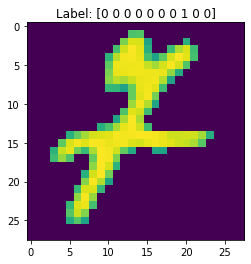

In [9]:
#vizualizácia bez použitia dodatočného filtru
plt.title(f"Label: {train_target[4800]}")
plt.imshow(img_1)

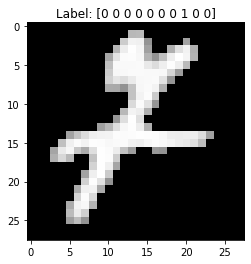

In [10]:
#vizualizácia s použitím čiernobieleho filtra "gray"
plt.title(f"Label: {train_target[4800]}")
plt.imshow(img_1, cmap="gray")

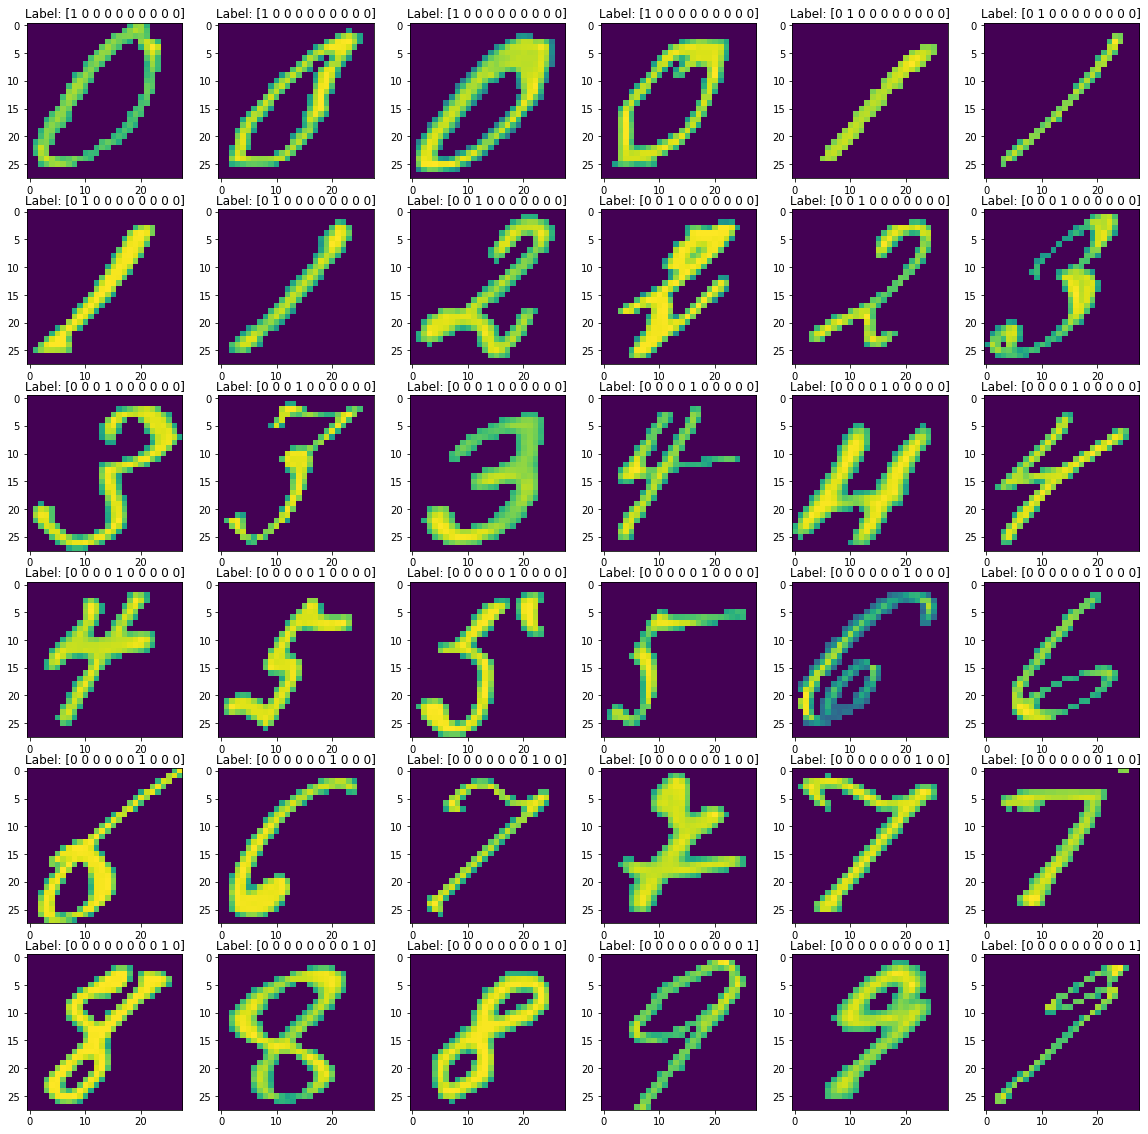

In [11]:
f, axarr = plt.subplots(6, 6, figsize=(20,20))
counter = 0

for i in range(0, 6):
    for j in range(0, 6):
        axarr[i, j].set_title(f"Label: {train_target[counter]}")
        axarr[i, j].imshow(train_data[counter].reshape(28, 28))
        counter += 180

---
## Rozbor datasetu:
Pri datasetoch určených na použitie pri strojovom učení je dôležitá ich vhodná robustnosť a škálovanie, ktoré dokážu pri vhodnej optimalizácii daného systému (neurónová sieť...) maximalizovať úspešnosť klasifikácie a minimalizovať trénovaci čas.
<br>Nakoľko ARDIS vychádza z referenčného datasetu MNIST, tak jeho tŕenovacia aj testovacia časť obsahuje absolútne rovnomerný počet vzoriek.

#### <span style="color: blue;">Trénovacie dáta:</span>

Text(0.5, 0.98, 'Početnosť vzoriek číslic v trénovacom datasete')

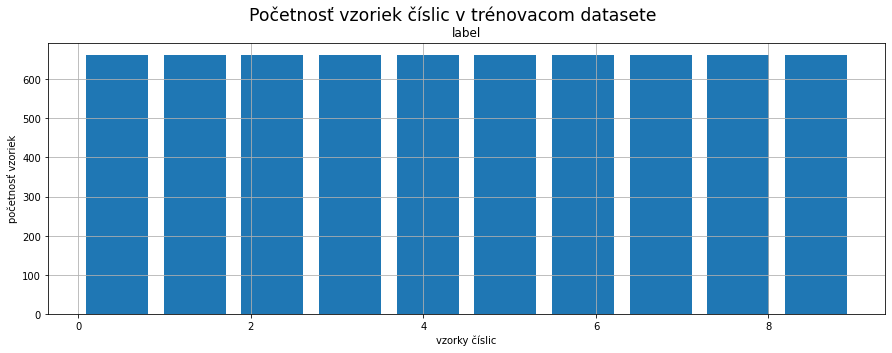

In [12]:
#preformátovanie ("target") poľa na vloženie do histogramu
tmp_train_target = np.array([])
for row in train_target:
    tmp_train_target = np.append(tmp_train_target, np.where(row == 1))
tmp_train_target = tmp_train_target.astype(int).reshape(-1, 1)
tmp_train_target_df = pd.DataFrame(tmp_train_target, columns = ["label"])

#zobrazenie histogramu zo zvolených údajov ("label")
tmp_train_target_df.hist(figsize=(15, 5), rwidth=0.8)
#nastavenie pomenovania x-ovej osi grafu
plt.xlabel("vzorky číslic")
#nastavenie pomenovania y-ovej osi grafu
plt.ylabel("početnosť vzoriek")
#nastavenie názvu grafu
plt.suptitle("Početnosť vzoriek číslic v trénovacom datasete", ha="center", fontsize="xx-large")

In [13]:
print("Početnosť vzoriek číslic v trénovacom datasete:")
sum_of_count = 0
for i in range(0,10):
    count = tmp_train_target_df[tmp_train_target_df.label==i].shape[0]
    sum_of_count += count
    print(f" - počet vzoriek čísla {i}: {count}")
avrg = sum_of_count/(i+1)
print(f"\nPriemerný počet vzoriek: {avrg}")

Početnosť vzoriek číslic v trénovacom datasete:
 - počet vzoriek čísla 0: 660
 - počet vzoriek čísla 1: 660
 - počet vzoriek čísla 2: 660
 - počet vzoriek čísla 3: 660
 - počet vzoriek čísla 4: 660
 - počet vzoriek čísla 5: 660
 - počet vzoriek čísla 6: 660
 - počet vzoriek čísla 7: 660
 - počet vzoriek čísla 8: 660
 - počet vzoriek čísla 9: 660

Priemerný počet vzoriek: 660.0


#### <span style="color: blue;">Trénovacie dáta:</span>

Text(0.5, 0.98, 'Početnosť vzoriek číslic v testovacom datasete')

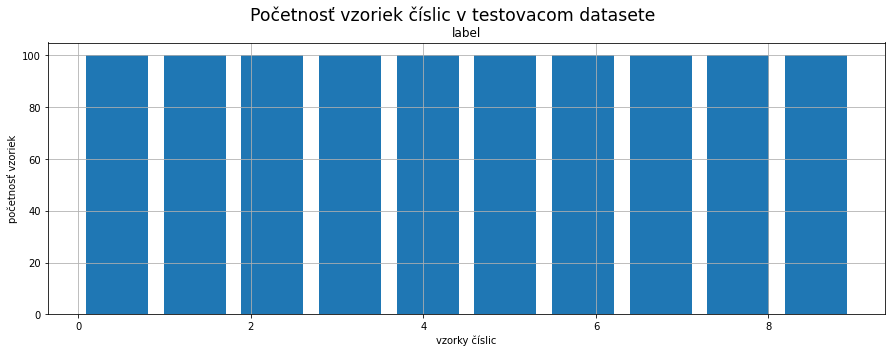

In [14]:
#preformátovanie ("target") poľa na vloženie do histogramu
tmp_test_target = np.array([])
for row in test_target:
    tmp_test_target = np.append(tmp_test_target, np.where(row == 1))
tmp_test_target = tmp_test_target.astype(int).reshape(-1, 1)
tmp_test_target_df = pd.DataFrame(tmp_test_target, columns = ["label"])

#zobrazenie histogramu zo zvolených údajov ("label")
tmp_test_target_df.hist(column="label", figsize=(15, 5), rwidth=0.8)
#nastavenie pomenovania x-ovej osi grafu
plt.xlabel("vzorky číslic")
#nastavenie pomenovania y-ovej osi grafu
plt.ylabel("početnosť vzoriek")
#nastavenie názvu grafu
plt.suptitle("Početnosť vzoriek číslic v testovacom datasete", ha="center", fontsize="xx-large")

In [15]:
print("Početnosť vzoriek číslic v testovacom datasete:")
sum_of_count = 0
for i in range(0,10):
    count = tmp_test_target_df[tmp_test_target_df.label==i].shape[0]
    sum_of_count += count
    print(f" - počet vzoriek čísla {i}: {count}")
avrg = sum_of_count/(i+1)
print(f"\nPriemerný počet vzoriek: {avrg}")

Početnosť vzoriek číslic v testovacom datasete:
 - počet vzoriek čísla 0: 100
 - počet vzoriek čísla 1: 100
 - počet vzoriek čísla 2: 100
 - počet vzoriek čísla 3: 100
 - počet vzoriek čísla 4: 100
 - počet vzoriek čísla 5: 100
 - počet vzoriek čísla 6: 100
 - počet vzoriek čísla 7: 100
 - počet vzoriek čísla 8: 100
 - počet vzoriek čísla 9: 100

Priemerný počet vzoriek: 100.0


#### <span style="color: blue;">Pomer trénovacích a testovacích dát:</span>

Text(0.5, 0.98, 'Pomer početnosti vzoriek číslic v trénovacom a testovacom datasete')

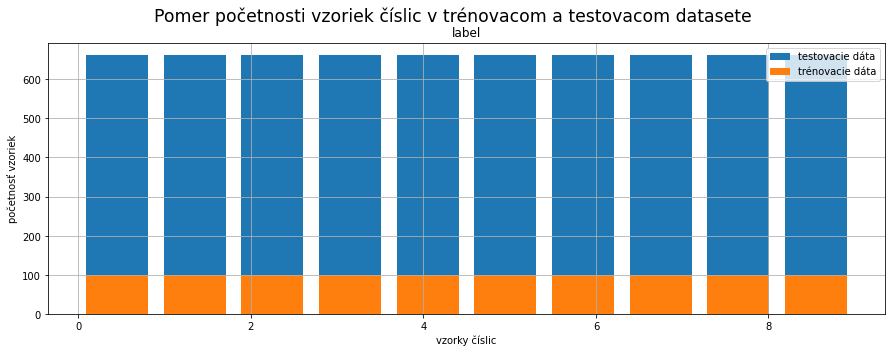

In [16]:
#zobrazenie histogramu zo zvolených údajov ("label")
ax = tmp_train_target_df.hist(column="label", figsize=(15, 5), rwidth=0.8)
tmp_test_target_df.hist(ax=ax, column="label", figsize=(15, 5), rwidth=0.8)
#nastavenie legendy
plt.legend(["testovacie dáta", "trénovacie dáta"])
#nastavenie pomenovania x-ovej osi grafu
plt.xlabel("vzorky číslic")
#nastavenie pomenovania y-ovej osi grafu
plt.ylabel("početnosť vzoriek")
#nastavenie názvu grafu
plt.suptitle("Pomer početnosti vzoriek číslic v trénovacom a testovacom datasete", ha="center", fontsize="xx-large")

In [17]:
print("Pomer početnosti vzoriek číslic v trénovacom a testovacom datasete (trénovacie dáta/testovacie dáta):")
for i in range(0,10):
    train_count = tmp_train_target_df[tmp_train_target_df.label==i].shape[0]
    test_count = tmp_test_target_df[tmp_test_target_df.label==i].shape[0]
    print(f" - počet vzoriek čísla {i}: {train_count}/{test_count}")

Pomer početnosti vzoriek číslic v trénovacom a testovacom datasete (trénovacie dáta/testovacie dáta):
 - počet vzoriek čísla 0: 660/100
 - počet vzoriek čísla 1: 660/100
 - počet vzoriek čísla 2: 660/100
 - počet vzoriek čísla 3: 660/100
 - počet vzoriek čísla 4: 660/100
 - počet vzoriek čísla 5: 660/100
 - počet vzoriek čísla 6: 660/100
 - počet vzoriek čísla 7: 660/100
 - počet vzoriek čísla 8: 660/100
 - počet vzoriek čísla 9: 660/100


## Zdroje:

Hochuli, A. G.; Britto JR, A. S. ; J. P. Barddal; Oliveira, L.S. ; Sabourin, R. "An End-To-End Approach for Recognition of Modern and Historical Handwritten Numeral Strings," In: IEEE International Joint Conference on Neural Networks, 2020.
<br><br>
Kusetogullari, H.; Yavariabdi, A.; Cheddad, A.; Grahn, H.; Hall, J. "ARDIS: A Swedish Historical Handwritten Digit Dataset," Neural Computing and Applications, 2019, Springer. DOI: 10.1007/s00521-019-04163-3.